In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar el conjunto de datos
data_path = './CTG.csv'
data = pd.read_csv(data_path)

# Mostrar las primeras filas del conjunto de datos y un resumen de los mismos
data.head(), data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

(       FileName       Date      SegFile      b       e    LBE     LB   AC  \
 0  Variab10.txt  12/1/1996  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
 1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
 2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
 3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   
 4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0   
 
     FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
 0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
 1  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
 2  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
 3  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
 4  0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  
 
 [5 rows x 40 columns],
                  b            e          LBE           LB        

In [3]:
# Análisis detallado de variables categóricas
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Listar las categorías y sus frecuencias para cada columna categórica
for columna in categorical_columns:
    print(f"\nCategorías y frecuencias para '{columna}':")
    print(data[columna].value_counts())

categorical_data = data[categorical_columns].describe(include='all')
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Frecuencias de las categorías en cada variable categórica
category_frequencies = {col: data[col].value_counts() for col in categorical_columns}

# Matriz de correlación de las variables numéricas
correlation_matrix = numeric_data.corr()

categorical_data, category_frequencies, correlation_matrix


Categorías y frecuencias para 'FileName':
FileName
S8001034.dsp    34
S7001029.dsp    33
S8001037.dsp    30
S8001038.dsp    26
S7001027.dsp    24
                ..
S7001006.dsp     1
S7001008.dsp     1
Mepfp_3.txt      1
Mrmmf_1.txt      1
Variab10.txt     1
Name: count, Length: 352, dtype: int64

Categorías y frecuencias para 'Date':
Date
2/22/1995     240
5/2/1996      160
7/18/1996     101
10/3/1996      92
5/3/1996       88
5/10/1998      85
5/1/1996       79
10/6/1996      79
6/6/1998       77
9/25/1996      74
1/8/1995       71
10/25/1997     70
1/4/1980       56
8/20/1996      55
11/26/1997     53
4/8/1998       53
5/6/1996       53
8/28/1996      52
12/9/1996      50
8/16/1996      43
7/16/1996      42
11/14/1997     38
9/23/1996      37
10/24/1997     34
12/20/1997     33
10/1/1997      30
3/23/1998      29
8/19/1996      28
9/20/1996      24
3/10/1997      23
8/31/1996      22
10/14/1996     21
1/2/1997       21
8/21/1996      19
9/10/1997      17
9/26/1996      10
12/23/19

(            FileName       Date      SegFile
 count           2126       2126         2126
 unique           352         48         2126
 top     S8001034.dsp  2/22/1995  CTG0001.txt
 freq              34        240            1,
 {'FileName': FileName
  S8001034.dsp    34
  S7001029.dsp    33
  S8001037.dsp    30
  S8001038.dsp    26
  S7001027.dsp    24
                  ..
  S7001006.dsp     1
  S7001008.dsp     1
  Mepfp_3.txt      1
  Mrmmf_1.txt      1
  Variab10.txt     1
  Name: count, Length: 352, dtype: int64,
  'Date': Date
  2/22/1995     240
  5/2/1996      160
  7/18/1996     101
  10/3/1996      92
  5/3/1996       88
  5/10/1998      85
  5/1/1996       79
  10/6/1996      79
  6/6/1998       77
  9/25/1996      74
  1/8/1995       71
  10/25/1997     70
  1/4/1980       56
  8/20/1996      55
  11/26/1997     53
  4/8/1998       53
  5/6/1996       53
  8/28/1996      52
  12/9/1996      50
  8/16/1996      43
  7/16/1996      42
  11/14/1997     38
  9/23/1996      3

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


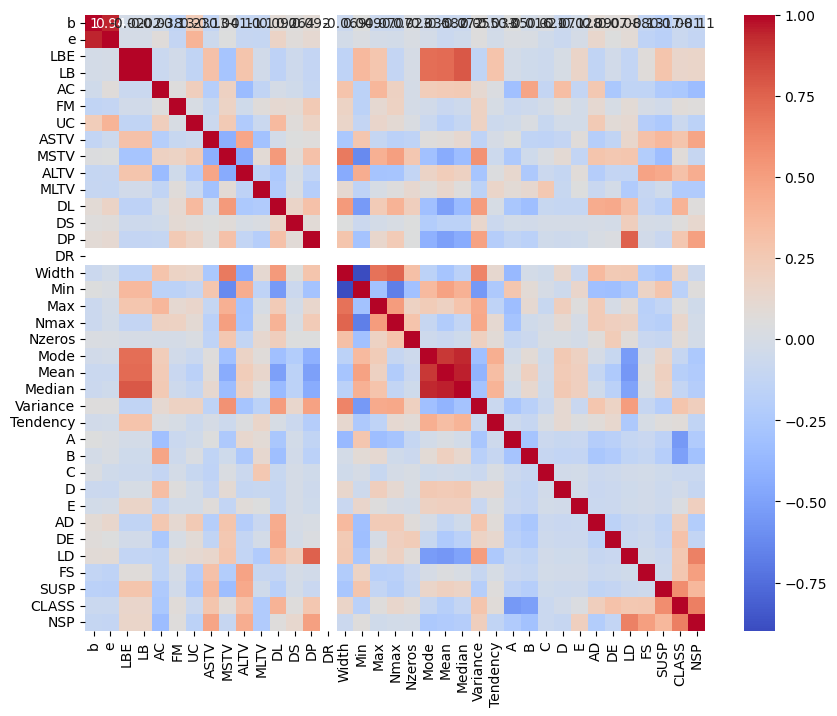

In [4]:
# Si deseas visualizarlo con un heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [5]:

columns = correlation_matrix.columns
# Crear listas para las coordenadas x, y, z y valores de correlación
x, y, z, correlation_values = [], [], [], []

for i in range(len(columns)):
    for j in range(len(columns)):
        x.append(columns[i])
        y.append(columns[j])
        z.append(correlation_matrix.iloc[i, j])
        correlation_values.append(correlation_matrix.iloc[i, j])

# Crear una figura 3D
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=correlation_values,  # Colorear según la correlación
        colorscale='Viridis',       # Escala de color
        colorbar=dict(title='Correlación')
    )
)])

# Configurar el diseño
fig.update_layout(
    title='Matriz de Correlación 3D',
    scene=dict(
        xaxis_title='Variables',
        yaxis_title='Variables',
        zaxis_title='Correlación'
    )
)

# Mostrar la figura
fig.show()

In [7]:
# Identificar columnas con valores faltantes
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Valores faltantes por columna:")
print(missing_data)
# Porcentaje de valores faltantes por columna
porcentaje_faltantes = (data.isnull().sum() / len(data)) * 100
print("\nPorcentaje de valores faltantes por columna:")
print(porcentaje_faltantes)


# Opciones de imputación para valores faltantes
# Calcular media, mediana y moda para las columnas numéricas con valores faltantes
# Rellenar valores faltantes con la media para las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

# Rellenar valores faltantes con la moda para las columnas categóricas
categorical_data = data.select_dtypes(include=['object', 'category'])
for column in categorical_data.columns:
    data[columna].fillna(data[column].mode()[0], inplace=True)
# Verificar si aún hay valores faltantes
valores_faltantes_tras_tratamiento = data.isnull().sum()
print("\nValores faltantes después del tratamiento:")
print(valores_faltantes_tras_tratamiento)

Valores faltantes por columna:
FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

Porcentaje de valores faltantes por columna:
FileName    0.140911
Date        0.140911
SegFile     0.140911
b           0.140911
e           0.140911
LBE         0.140911
LB          0.140911
AC          0.140911
FM          0.093941
UC          0.093941
ASTV        0.093941
MSTV        0.093941
ALTV        0.093941
MLTV        0.093941
DL          0.046970
DS          0.046970
DP          0.

In [10]:
from scipy import stats

# Z-scores
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Umbral típico de 3 para detectar outliers
outliers = (abs(z_scores) > 3).sum(axis=1)
print(f'Número de outliers detectados: {outliers.sum()}')

# -------------------------------------------------------------------------------------------

# Seleccionar solo las columnas numéricas para la detección de anomalías
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Crear y ajustar el modelo de Isolation Forest
model_iforest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
numeric_data['anomaly'] = model_iforest.fit_predict(numeric_data)

# Añadir una columna para indicar si el registro es una anomalía (1: normal, -1: anomalía)
numeric_data['anomaly'] = numeric_data['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Mostrar la cantidad de anomalías detectadas
anomalies_count = numeric_data['anomaly'].value_counts()
print("Conteo de anomalías detectadas:")
print(anomalies_count)

# Mostrar algunos ejemplos de las anomalías detectadas
anomalies_detected = numeric_data[numeric_data['anomaly'] == 'anomaly']
print("\nEjemplos de anomalías detectadas:")
print(anomalies_detected.head())

Número de outliers detectados: 1075
Conteo de anomalías detectadas:
anomalía
normal      2022
anomalía     107
Name: count, dtype: int64

Ejemplos de anomalías detectadas:
        b       e    LBE     LB   AC     FM    UC  ASTV  MSTV  ALTV  ...    D  \
0   240.0   357.0  120.0  120.0  0.0    0.0   0.0  73.0   0.5  43.0  ...  0.0   
5     0.0   953.0  134.0  134.0  1.0    0.0  10.0  26.0   5.9   0.0  ...  0.0   
6   240.0   953.0  134.0  134.0  1.0    0.0   9.0  29.0   6.3   0.0  ...  0.0   
20  298.0  1192.0  129.0  129.0  0.0  304.0   4.0  30.0   2.1   0.0  ...  0.0   
22  538.0  1194.0  128.0  128.0  0.0  219.0   2.0  34.0   2.5   0.0  ...  0.0   

      E   AD   DE   LD   FS  SUSP  CLASS  NSP  anomalía  
0   0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  anomalía  
5   0.0  0.0  0.0  1.0  0.0   0.0    8.0  3.0  anomalía  
6   0.0  0.0  0.0  1.0  0.0   0.0    8.0  3.0  anomalía  
20  0.0  0.0  0.0  1.0  0.0   0.0    8.0  3.0  anomalía  
22  0.0  0.0  0.0  1.0  0.0   0.0    8.0  3.0  anom

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of

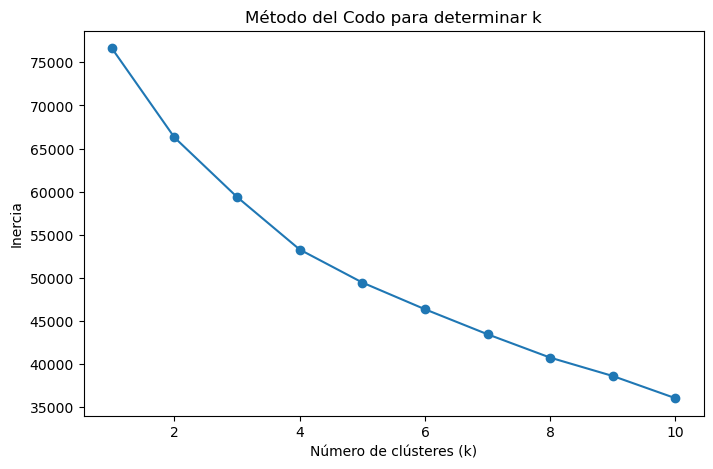

In [11]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Escalamiento de los datos numéricos (escalado estándar)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Determinar el número óptimo de clústeres usando el método del codo
inertia = []
rango_k = range(1, 11)

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(rango_k, inertia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.show()

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Cambia el número de clusters según tu análisis
numeric_data['cluster'] = kmeans.fit_predict(numeric_data_scaled)


# Mostrar algunos ejemplos de los clústeres formados
print("\nEjemplos de los datos agrupados:")
print(numeric_data.head())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Ejemplos de los datos agrupados:
       b       e    LBE     LB   AC   FM   UC  ASTV  MSTV  ALTV  ...    D  \
0  240.0   357.0  120.0  120.0  0.0  0.0  0.0  73.0   0.5  43.0  ...  0.0   
1    5.0   632.0  132.0  132.0  4.0  0.0  4.0  17.0   2.1   0.0  ...  0.0   
2  177.0   779.0  133.0  133.0  2.0  0.0  5.0  16.0   2.1   0.0  ...  0.0   
3  411.0  1192.0  134.0  134.0  2.0  0.0  6.0  16.0   2.4   0.0  ...  0.0   
4  533.0  1147.0  132.0  132.0  4.0  0.0  5.0  16.0   2.4   0.0  ...  0.0   

     E   AD   DE   LD   FS  SUSP  CLASS  NSP  cluster  
0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0        2  
1  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0        1  
2  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0        1  
3  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0        1  
4  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0        0  

[5 rows x 38 columns]


# Análisis descriptivo de los datos
a. Variables numéricas: Estadísticas básicas
Se han obtenido estadísticas descriptivas como la media, la desviación estándar, el valor mínimo, máximo, entre otros, para las 37 variables numéricas del conjunto de datos. Por ejemplo, la variable b tiene una media de 878.44 y una desviación estándar de 894.08, mientras que la variable FM tiene una media de 7.5 y una desviación estándar de 39.03.

b. Variables categóricas: Categorías y frecuencias
Las columnas categóricas (como FileName, Date, y SegFile) tienen diferentes categorías y frecuencias. Por ejemplo, FileName tiene varias entradas, como "Variab10.txt", "Fmcs_1.txt", entre otros.

# Matriz de correlación de las variables numéricas
La matriz de correlación muestra la relación entre las diferentes variables numéricas. Algunas correlaciones destacadas:

CLASS tiene una correlación positiva alta con NSP (0.64).
ASTV y ALTV tienen correlaciones significativas con otras variables, como AC.

# Tratamiento de valores faltantes
Las columnas con valores faltantes fueron identificadas, incluyendo tanto variables numéricas como categóricas. Los valores faltantes en variables numéricas fueron rellenados con la media, y los registros con valores faltantes en variables categóricas fueron eliminados.

Ejemplo: Las variables b, e, FM, UC, y otras, tenían valores faltantes que se llenaron con la media de cada columna.